In [5]:
import pandas as pd
import pytextrank
import spacy
from spacy.tokens import Span
from germalemma import GermaLemma
from keybert import KeyBERT
import pandas as pd

In [6]:
#Then quit and come back later… and open with pickle.load...
import pickle
with open('Data_KeyBert_new.pkl', 'rb') as f:
    data = pickle.load(f)

In [7]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [4]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten','weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion', 'arbeitsbedingungen','wissenschaftliche aktivitäten', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung','wissenschaftliche aktivitäten', 'auslandsaufenthalt', 'gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [5]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 [''],
 ['promotion',
  'arbeitsbedingungen',
  'wissenschaftliche aktivitäten',
  'weiterbildung',
  'auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion',
  'arbeitsbedingungen',
  'weiterbildung',
  'wissenschaftliche aktivitäten',
  'auslandsaufenthalt',
  'gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [6]:
keywords_within_text = []
for i in range(len(GT_within_text)):
    keywords_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            keywords_within_text[i].append(GT_within_text[i][j])

In [7]:
data

,Documents,file_name,Text,Ground_Truth,Text_Sentences
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[Die Hochschule, an der Sie im Dezember 2018 z..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...",[Wie ist dieser studienvorbereitende Kurs verl...
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[Welchen Studienabschluss haben Sie in Ihrem l...
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[An welcher Art Hochschule studieren Sie., Wel..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[Wie würden Sie Ihre derzeitige Tätigkeit bzw....
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[Wie zufrieden sind Sie mit Ihrem bisherigen B...
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[In welcher Sprache möchten Sie die Befragung ...
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...",[Waren oder sind Sie seit der letzten Befragun...
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[Welchen Abschluss streben Sie in Ihrem derzei...


In [8]:
keywords_within_text[13]

['promotion', 'arbeitsbedingungen', 'weiterbildung', 'auslandsaufenthalt']

In [9]:
keyphrases_within_text = []
for i in range(len(GT_within_text)):
    keyphrases_within_text.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) > 1:
            keyphrases_within_text[i].append(GT_within_text[i][j])

In [10]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [11]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau","ca", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
878


In [13]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [14]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [15]:
data["clean_text"][11]

'Waren oder sind Sie seit der letzten Befragung im in irgendeiner Form erwerbstätig . Bitte geben Sie mit Hilfe der Zeilennummern an bei welcher Stelle es sich um Ihre aktuelle Stelle handelt . Handelt es sich bei Ihrer letzten beruflichen Station um dieselbe Stelle die Sie zum Zeitpunkt der letzten Befragung im ausgeübt haben . Handelte es sich bei Ihrer letzten Stelle um eine Tätigkeit in der Wissenschaft . Welcher der folgenden Personalkategorien konnten Sie sich zuordnen . Waren Sie zuletzt im öffentlichen Dienst bzw . einem dem öffentlichen Dienst tariflich angeglichenen Arbeitsverhältnis beschäftigt . Wie viele Mitarbeiter innen waren bei Ihrem Arbeitgeber beschäftigt . Welchem Wirtschaftsbereich gehörte der Betrieb bzw . die Einrichtung in dem der Sie arbeiteten schwerpunktmäßig an . Haben Sie zuletzt in einer Position gearbeitet in der ... Haben Sie zuletzt in einer Position gearbeitet in der ... Wie viel Euro pro Jahr erhielten Sie darüber hinaus jährlich in Form von Zulagen .

In [16]:
clean_text_df=[]
for i in range(len(data["Text_Sentences"])):
    clean_text_df.append([])
    for elem in data["Text_Sentences"][i]:
        clean_text_df[i].append(clean_text(elem, for_embedding=True))

In [17]:
new_clean_text = []
for i in range(len(clean_text_df)):
    new_clean_text.append((list(filter(lambda x: x, clean_text_df[i]))))

In [18]:
data["Clean_Text_Sentences"] = new_clean_text

In [19]:
len(data["Clean_Text_Sentences"][8])

151

In [20]:
Preprocesed_text = []
for i in range(len(data["Clean_Text_Sentences"])):
    Preprocesed_text.append([])
    for j in range(len(data["Clean_Text_Sentences"][i])):
        Preprocesed_text[i].append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["Clean_Text_Sentences"][i][j])) 

In [21]:
Preprocesed_text[10]

['Welches Ergebnis haben Sie bei der Sprachprüfung für den Hochschulzugang DSH TestDaF oder andere Prüfung erhalten. Ich habe. Ich habe das Niveau. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Welches Ergebnis haben Sie bei der Feststellungsprüfung für den Hochschulzugang erhalten. Ich habe die Gesamtnote. Ich habe die Prüfung bestanden aber weiß das Ergebnis nicht mehr. Ich habe die Prüfung nicht bestanden aber weiß das Ergebnis nicht mehr. Ich habe noch kein Prüfungsergebnis erhalten.',
 'Was machen Sie zurzeit genau. Ich studiere in einem Studiengang an einer Hochschule oder Universität. Ich besuche einen weiteren Kurs zur Vorbereitung auf eine Sprachprüfung für den Hochschulzugang. DSH TestDaF. Ich besuche einen weiteren Schwerpunktkurs zur Vorbereitung auf eine Feststellungsprüfung an einem Studienkolleg. Ich warte auf meinen Prüfungstermin

In [22]:
cleaned_text = []
for i in range(len(Preprocesed_text)):
    cleaned_text.append([])
    for j in range(len(Preprocesed_text[i])):
        for line in Preprocesed_text[i][j].split('\n'):
            # Replace multiple dots with space
            line = re.sub('\. \.+', '.', line) 
            # Remove single dots
            cleaned_text[i].append(re.sub('\.', '.', line))

In [23]:
cleaned_text[15]

['Haben Sie eine Promotion begonnen oder abgeschlossen.',
 'In welchem Stadium Ihrer Promotion befinden Sie sich derzeit.',
 'Haben Sie die Arbeit an Ihrer Promotion zwischenzeitlich für einen längeren Zeitraum mind.',
 'Bestand zwischen Ihrem Studium und Ihrer Promotion ein fachlicher Zusammenhang.',
 'Mit welcher Gesamtnote haben Sie Ihre Promotion abgeschlossen.',
 'In welchem institutionellen Rahmen promovierten Sie vorwiegend.',
 'Hatten Sie eine Qualifikationsstelle eine Stelle bei der laut Arbeitsvertrag die Promotion zu Ihren Dienstaufgaben gehört.',
 'Haben Sie während Ihrer Promotionsphase Lehrerfahrungen an einer Hochschule sammeln können.',
 'Was trifft auf die von Ihnen durchgeführten Lehrveranstaltungen zu.',
 'Welche Form hat Ihre Dissertation.',
 'War Ihr Hauptbetreuer in gleichzeitig auch Gutachter in Ihrer Dissertation.',
 'Haben Sie mit Ihren Betreuer inne schriftliche Vereinbarungen zu den Zielen und Aufgaben beider Seiten im Rahmen Ihrer Promotion getroffen Betreuu

In [24]:
# #using spacy model for POS tagging
# nlp = spacy.load('de_core_news_lg')
# Extracted_Pos_tags=[]  # can change it to Extracted_Noun
# for i in range(len(cleaned_text)):
#     Extracted_Pos_tags.append([])
#     for j in range(len(cleaned_text[i])):
#         Extracted_Pos_tags[i].append([])
#         doc = nlp(cleaned_text[i][j])
#         for t in doc:
#             tag=t.pos_
#             if t.text not in Extracted_Pos_tags[i][j]:
#                 Extracted_Pos_tags[i][j].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple   

In [25]:
# lemmatizer = GermaLemma()
# lemmatized_words = []
# nlp = spacy.load('de_core_news_lg')

# for i in range(len(Extracted_Pos_tags)):
#     lemmatized_words.append([])
#     for j in range(len(Extracted_Pos_tags[i])):
#         lemmatized_words[i].append([])
#         lemma_spacy = nlp(cleaned_text[i][j])
#         for l in range(len(lemma_spacy)):
#             token = lemma_spacy[l]
#             if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
#                 lemmatized_words[i][j].append(token.lemma_)
#             else:
#                 lemmatized_words[i][j].append(lemmatizer.find_lemma(Extracted_Pos_tags[i][j][l][0], Extracted_Pos_tags[i][j][l][1]))

In [26]:
# lemmatized_words[0][0]

In [27]:
# lemma_sentences = []
# for i in range(len(lemmatized_words)):
#     lemma_sentences.append([])
#     for j in range(len(lemmatized_words[i])):
#         lemma_sentences[i].append(' '.join(lemmatized_words[i][j]))

In [28]:
# data["Lemma_Text_Sentences"] = lemma_sentences

In [29]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(cleaned_text)):
    for j in range(len(cleaned_text[i])):
        tokens = nltk.word_tokenize(cleaned_text[i][j]) #without nltk.word_tokenize, it gives character level DF
        for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
 

In [30]:
DF

{'Die': {0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 16},
 'Hochschule': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18},
 'an': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'der': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Sie': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'im': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Dezember': {0, 6},
 'zur': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18},
 'Promotion': {0, 2, 4, 5, 7, 8, 11, 13, 15},
 'registriert': {0},
 'waren': {0, 2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18},
 'hat': {0, 2, 3, 4, 7, 8, 11, 13, 14, 15, 16},
 'ebenfalls': {0},
 'Interesse': {0, 1, 2, 3, 5, 6, 12, 14, 16, 17},
 'daran': {0, 3, 9, 12, 16},
 'mehr': {0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 14, 15, 16, 17, 18},
 'über': {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17},
 'die': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16

In [31]:
for word,freq in DF.items():
    print(word,len(freq))

Die 13
Hochschule 18
an 19
der 19
Sie 19
im 19
Dezember 2
zur 18
Promotion 9
registriert 1
waren 15
hat 11
ebenfalls 1
Interesse 10
daran 5
mehr 15
über 16
die 19
Promotionsbedingungen 1
ihrer 6
Promovierenden 2
zu 19
erfahren 5
. 19
Anfang 2
Ihrer 19
offiziell 3
als 19
Doktorand 1
in 19
Handelt 6
es 18
sich 19
um 17
eine 19
gemeldete 1
Unterbrechung 2
Können 3
noch 16
erinnern 1
welchem 17
Quartal 1
mit 19
den 19
Arbeiten 8
begonnen 14
haben 19
zugelassen 1
wurden 15
Ist 14
Ihre 19
darüber 10
informiert 3
dass 17
abgebrochen 7
Ihrem 17
Promotionsverfahren 1
Ausland 12
beteiligt 3
dabei 7
einen 18
gemeinsamen 6
Abschluss 16
Hochschulen 9
aus 19
dem 19
In 19
und 19
cotutelle 1
de 2
thèse 1
ihrem 4
Fachhochschule 6
bzw 16
Waren 15
letzten 17
Jahren 4
Universität 9
des 18
Saarlandes 1
UdS 1
wissenschaftliche 13
Beschäftigte 1
tätig 12
Wie 19
attraktiv 1
bewerten 5
Arbeitgeberin 1
Wurden 4
Sicht 5
Einsparungen 1
vorgenommen 1
Veränderungen 4
führten 1
diese 15
Strukturentscheidungen 1
getr

bestanden 2
weiß 7
kein 10
Prüfungsergebnis 2
Gesamtnote 4
Vorbereitungskurs 1
besuchen 4
Einen 6
Sprachkurs 4
Vorbereitung 6
Telc 1
Schwerpunktkurs 2
Studienkolleg 2
keinen 11
Studienvorbereitung 2
technisches 1
naturwissenschaftliches 1
medizinisches 1
wirtschafts 1
sozialwissenschaftliches 1
geistes 1
kulturwissenschaftliches 1
machen 14
genau 8
studiere 2
Studiengang 8
warte 2
Prüfungstermin 2
mache 5
anderes 5
Meinung 6
Ende 6
dieses 7
Studienvorbereitungskurses 1
bestehen 4
unsicher 7
nehme 3
teil 5
beschreibt 2
besten 6
darauf 3
beginnen 4
suche 3
Studienplatz 2
Ausbildungsplatz 2
Berufsausbildung 10
Schule 6
Arbeitsstelle 3
Job 3
Hausfrau 2
Hausmann 2
zuhause 2
Nichts 2
davon 8
aufnehmen 5
gerade 2
Bachelor 4
Master 6
Staatsexamen 4
Diplom 4
Lehramtsstudium 2
Promotionsstudium 2
Dr. 2
PhD 2
abschließen 3
männlich 2
weiblich 2
divers 1
zuordnen 7
Aufenthaltsstatus 2
Visum 3
Aufenthaltserlaubnis 2
Studiums 11
EU 2
Schengen 2
Mitgliedstaates 2
Anerkannter 2
Flüchtlingsstatus 2
Asy

kön 1
nen 1
gewartet 1
Sterben 1
eingegriffen 1
verstoßen 1
Hochschulabsolventen 1
aufgrund 4
besondere 3
Allgemeinheit 1
Ort 6
Hochschulstandort 1
Liegt 1
längerdauernde 1
chronische 1
Erkrankung 2
jetziges 1
Fachinteresse 1
Begabung 1
späteren 3
Aussichten 1
sicheren 5
Führungsposition 2
Ausweichlösung 1
Übergang 1
Einführung 2
Einschreibung 1
Zimmersuche 1
Tage 2
Camps 1
Orientierungswochen 1
Tutorenprogramme 1
studentische 3
AGs 1
Studienbeginn 3
Mentorenprogramme 1
Methoden 7
Arbeitens 1
Grundlagen 1
Propädeutik 1
Prüfungsordnung 1
Studienberatung 3
BAföG 7
Stipendien 1
Studienkredite 1
Arbeitsmarktsituation 1
angestrebten 5
Tätigkeitsfeld 1
Hauptstudienfach 3
Leistungsnormen 1
ansprüche 1
gegliederten 1
Klarheit 1
Prüfungsanforderungen 2
engen 1
Berufsvorbereitung 1
Konkurrenz 3
Studierenden 6
Beziehungen 3
Überfüllung 1
internationale 4
Worin 1
Hochschulstudiums 2
interessante 3
sichern 2
soziale 2
gewählte 1
gebildete 1
Persönlichkeit 4
möglichst 8
hinauszuschieben 1
Leuten 2
h

Attraktivität 1
Standortes 1
Partnerschaftliche 1
familiäre 2
Nutzung 4
Netzwerken 2
Erstellen 2
Lesen 5
Erkenntnissen 6
innovative 5
Prozesse 6
Produkte 5
Forschungskooperation 2
Mitarbeit 1
Grundlagenforschung 2
angewandter 1
Techniken 5
Entwicklungsprojekten 5
Koordination 6
forschungs 5
entwicklungsrelevanten 5
Mitwirkung 4
professionellen 2
Fachverbänden 1
Gesellschaften 1
Studienabschlussarbeiten 2
Arbeitsumgebung 1
fachlich 4
gemischten 1
Fachrichtungen 1
bewertet 6
Erfolge 1
herrscht 1
innovatives 1
Klima 2
Fachgrenzen 1
hinausdenken 1
Wert 2
Eigeninitiative 1
gelegt 1
Arbeitsbereich 1
weitgehend 2
Misserfolgen 1
Schuldigen 1
Ursachen 1
Kund 2
Klient 2
Misserfolge 1
ignoriert 1
Kunden 1
vordefiniert 1
Arbeitszusammenhänge 1
eingebunden 2
Verbesserungsvorschläge 1
geprüft 1
Überstunden 3
erfolgsabhängige 1
Bestandteile 2
familienfreundlich 1
dienstlich 1
reisen 1
Berufsalltag 1
brauche 5
Fremdsprachen 1
verläuft 1
kooperative 1
Atmosphäre 4
Bürokratie 1
sagen 8
Hinsichtlich 6
St

Kommunikationstechnologien 1
IKT 1
mehrmonatigen 1
Meister 2
Technikerschule 2
Fachakademie 2
Kein 2
Beruflicher 2
unbekannt 2
Sonstiger 4
berufsständisch 3
organisierte 3
Fachärztin 3
Facharzt 3
Fachzahnärztin 3
arzt 3
Psychotherapeut 3
Fachtierärztin 3
Fachtierarzt 3
Fachanwältin 3
Fachanwalt 3
berufsqualifizierende 3
Schuljahr 1
Au 1
pair 1
mehrwöchigen 1
Schüleraustausch 1
Ferienjob 1
touristischen 1
BOLD 1
END 1
komplettes 1
Teilstudium 1
AuslandPraktikum 1
Semesterferienjob 1
studienbezogenen 4
Schulzeiten 2
Studienzeiten 3
Kontext 1
Wege 2
Kommunikation 4
Telefonie 1
Internettelefonie 1
Skype 1
Cloud 1
Computing 1
Dropbox 1
Drive 1
Virtuelle 1
Arbeitsumgebungen 1
Fernüberwachung 1
Fernanalyse 1
Antragssteller 2
Fördervolumen 2
Fachzahnarzt 3
Psychotherapeutin 3
Psychotherapeuten 3
angegebene 2
Promotionsurkunde 2
vereinbarten 2
Betreiben 2
offiziellen 1
Regelung 1
eingeschrieben 4
strebten 2
Aufgrund 2
Zugangsvoraussetzungen 1
Zugangsvoraussetzung 1
erster 2
zwischendurch 1
inof

klassische 1
Tages 1
Wochenzeitung 1
faulenzen 1
spazieren 1
Karten 1
Gesellschaftsspiele 1
Lesung 1
fachspezifischem 1
beizutragen 1
entsprechenden 1
Berufen 1
wissenschaftlichem 1
Berufsmöglichkeiten 1
Berufsposition 1
Einkommens 1
Verdienstchancen 1
Berufswunsches 1
vornherein 1
kam 2
kurzen 1
kleinste 1
Studienrichtung 1
Rufs 1
vielfältigen 1
überschaubaren 1
Verhältnisse 1
Freizeitangebots 1
Kneipen 1
studentisches 1
günstigen 1
Lebensbedingungen 1
Lebenshaltung 1
lebt 1
Bewertungen 1
Rangliste 1
erhielt 1
Ranking 1
Zulassungsbeschränkungen 1
fern 1
Zum 2
Ernährungsverhalten 1
orientiert 1
satt 1
Ambiente 1
kommunikationsorientiert 1
Ereignis 1
vegetarisch 1
vegan 1
häufigsten 1
genutzten 1
Ernährungsqualität 1
Gesundheitswert 1
Kombinationsmöglichkeiten 1
Raumgestaltung 1
Präsentation 1
Darbietung 1
Essenangebots 1
Veranstaltungsplan 1
Pausen 1
ungünstige 1
ungemütliche 1
Wartezeiten 1
Lebensmittelinhalte 1
teuer 1
bringe 1
Freiwilliger 1
Verzicht 1
Ethische 1
Religiöse 1
Redukti

In [32]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [33]:
df_list.sort(key=lambda x:x[1])

In [34]:
df_list

[('registriert', 0.05263157894736842),
 ('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingungen', 0.05263157894736842),
 ('Doktorand', 0.05263157894736842),
 ('gemeldete', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zugelassen', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('Saarlandes', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigte', 0.05263157894736842),
 ('attraktiv', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('Einsparungen', 0.05263157894736842),
 ('vorgenommen', 0.05263157894736842),
 ('führten', 0.05263157894736842),
 ('Strukturentscheidungen', 0.05263157894736842),
 ('Führten', 0.05263157894736842),
 ('Forschungsprojekts', 0.05263157894736842),
 ('Forschungsprojekt', 0.05263157894736842),
 ('konkretes', 0.05263157894736842),
 ('Graduiertenakademie', 0.05263157894736842),
 ('HHU', 0.052

In [35]:
word_counts = [x[1] for x in df_list]

In [36]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [37]:
df_analysis

,index,0
0,0.052632,2889
1,0.105263,832
2,0.157895,381
3,0.210526,268
4,0.263158,178
5,0.315789,134
6,0.368421,83
7,0.421053,63
8,0.473684,41
9,0.526316,43


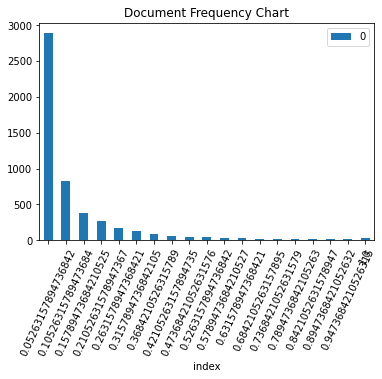

In [38]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [39]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [40]:
Pos_tags=[]
for i in range(len(data['Ground_Truth'])):
    Pos_tags.append([])
    sw = nlp(data['Ground_Truth'][i])
    for t in sw:
        tag=t.pos
        if t.text not in Pos_tags:
            Pos_tags[i].append((t.text, t.pos_))

In [41]:
Pos_tags

[[("'", 'PUNCT'),
  ('wissenschaftssystem', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('betreuung', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftliche', 'ADJ'),
  ('karriere', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsformen', 'VERB'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsmotive', 'ADJ'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('vereinbarkeit', 'NOUN'),
  ('von', 'ADP'),
  ('familie', 'NOUN'),
  ('und', 'CCONJ'),
  ('beruf', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('nicht-monetäre', 'ADJ'),
  ('erträge', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('wissenschaftlicher', 'ADJ'),
  ('nachwuchs', 'NOUN'),
  ("'", 'PUNCT'),
  (',', 'PUNCT'),
  ("'", 'PUNCT'),
  ('promotionsabbruch', 'ADV'),
  ("'", 'PUNCT'),
 

In [42]:
# Extracted_Pos_tags
# 9 pair of adjective and noun, where adjetive is followed by noun and there one pair where verb is followed by noun.

In [43]:
# from collections import Counter
# word_counts = []
# for i in range(len(Extracted_Pos_tags)):
#     word_counts.append(Counter(Extracted_Pos_tags[i]))

In [44]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [45]:
#using the keybert library
from keybert import KeyBERT
kw_model = KeyBERT("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli")  #("clips/mfaq") #("symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli") 
#clips/mfaq

In [46]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
# # Init default vectorizer.
vectorizer = KeyphraseCountVectorizer(spacy_pipeline='de_core_news_lg', pos_pattern= '((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)')

In [47]:
#The default pattern is <J.*>*<N.*>+ which means that it extract keyphrases 
#that have 0 or more adjectives followed by 1 or more nouns.

# only extract a noun: pos_pattern='<N.*>'

In [48]:
# Print parameters
print(vectorizer.get_params())

{'binary': False, 'dtype': <class 'numpy.int64'>, 'lowercase': True, 'max_df': None, 'min_df': None, 'pos_pattern': '((<ART.*>|<AD.*>)*<N.*>+)((<KO.*>|<AP.*>)+((<ART.*>|<AD.*>)*<N.*>+))*|(<ADJ.*>*<N.*>+)', 'spacy_pipeline': 'de_core_news_lg', 'stop_words': 'english', 'workers': 1}


In [49]:
# After initializing the vectorizer, it can be fitted
# to learn the keyphrases from the text documents.
for i in range(len(cleaned_text)):
    vectorizer.fit(cleaned_text[i])

In [50]:
# After learning the keyphrases, they can be returned.
keyphrases = []  
keyphrases.append(vectorizer.get_feature_names_out())

In [51]:
keyphrases

[array(['bisher studienbezogen im ausland', 'wechsel', 'studienzeit',
        'studienkredit von der kfw bankengruppe', 'jüngstes kind',
        'freizeit kultur und sport', 'wohnprobleme im gastland',
        'der hochschule einschließlich ortsangabe', 'konto',
        'finanzierung', 'den eindruck',
        'die folgenden gründe für die wahl', 'andere finanzierungsquelle',
        'attraktivere stadt', 'des bevorzugten ziellandes',
        'bildungskredit', 'bafög förderung', 'die folgenden aussagen',
        'höheren wohnbedarf bei mietkosten', 'sonstiges thema',
        'der stipendiengeber',
        'lernmittel fachliteratur schreibwaren kopien chemikalien druckerpatronen',
        'geschwister', 'bessere studienbedingungen',
        'sonstiges stipendium', 'anderen verwandten bekannten',
        'die studiengebühren', 'partner', 'praktische erfahrungen',
        'studienangebot', 'eigene trägheit', 'die nachfolgenden aussagen',
        'ein stipendium', 'einer woche während der v

In [52]:
# stop_words=stop_words
new_set_keyphrases = []
for i in range(len(cleaned_text)):
    new_set_keyphrases.append(kw_model.extract_keywords(cleaned_text[i], vectorizer=vectorizer, top_n=15, use_maxsum=True, diversity=0.9))
    

/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
503it [00:00, 1261.19it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  warnings.warn("Although extracting keywords for multiple documents is faster "
114it [00:00, 1717.70it/s]
/home/pawan/.local/lib/python3.7/site-packages/keybert/_model.py:130: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memo

In [53]:
new_set_keyphrases[0]

[[('ebenfalls interesse', 0.1165),
  ('promotion', 0.2472),
  ('die promotionsbedingungen', 0.2774),
  ('dezember zur promotion', 0.291),
  ('promovierenden', 0.3277),
  ('hochschule', 0.3446),
  ('die hochschule', 0.3475)],
 [('anfang dezember', 0.1354), ('hochschule', 0.1938), ('doktorand', 0.2738)],
 [('hochschule', 0.3264),
  ('eine offiziell der hochschule', 0.3469),
  ('gemeldete unterbrechung', 0.4849)],
 [('quartal', 0.0876), ('den arbeiten', 0.1366)],
 [('quartal', 0.1477)],
 [('promotion', 0.0605), ('hochschule', 0.2032)],
 [('quartal', 0.1553), ('promotion', 0.1928)],
 [('promotionsverfahren', 0.1023),
  ('hochschule', 0.2805),
  ('ausland', 0.3007),
  ('eine hochschule im ausland', 0.4422)],
 [('ausland', 0.044), ('einen gemeinsamen abschluss', 0.4347)],
 [('promotionsverfahren', 0.5), ('eine fachhochschule', 0.7062)],
 [('des saarlandes', 0.2995),
  ('der universität', 0.3173),
  ('den letzten jahren an der universität', 0.6416),
  ('des saarlandes uds als wissenschaftlich

In [54]:
#flattening the list
flatten_list= []
for i in range(len(new_set_keyphrases)):
    flatten_list.append([item for sublist in new_set_keyphrases[i] for item in sublist])

In [55]:
#to remove None Found - for keyphrase vectorizer
for i in range(len(flatten_list)):
    for elm in list(flatten_list[i]):
        if type(elm)!= tuple:
            flatten_list[i].remove(elm)

In [56]:
flatten_list[0]

[('ebenfalls interesse', 0.1165),
 ('promotion', 0.2472),
 ('die promotionsbedingungen', 0.2774),
 ('dezember zur promotion', 0.291),
 ('promovierenden', 0.3277),
 ('hochschule', 0.3446),
 ('die hochschule', 0.3475),
 ('anfang dezember', 0.1354),
 ('hochschule', 0.1938),
 ('doktorand', 0.2738),
 ('hochschule', 0.3264),
 ('eine offiziell der hochschule', 0.3469),
 ('gemeldete unterbrechung', 0.4849),
 ('quartal', 0.0876),
 ('den arbeiten', 0.1366),
 ('quartal', 0.1477),
 ('promotion', 0.0605),
 ('hochschule', 0.2032),
 ('quartal', 0.1553),
 ('promotion', 0.1928),
 ('promotionsverfahren', 0.1023),
 ('hochschule', 0.2805),
 ('ausland', 0.3007),
 ('eine hochschule im ausland', 0.4422),
 ('ausland', 0.044),
 ('einen gemeinsamen abschluss', 0.4347),
 ('promotionsverfahren', 0.5),
 ('eine fachhochschule', 0.7062),
 ('des saarlandes', 0.2995),
 ('der universität', 0.3173),
 ('den letzten jahren an der universität', 0.6416),
 ('des saarlandes uds als wissenschaftliche beschäftigte', 0.6741),
 (

In [57]:
# #to check the keyphrases
# keyphrases_set = []
# for i in range(len(flatten_list)):
#     if len(flatten_list[i][0].split(" "))> 1:
#         keyphrases_set.append(flatten_list[i])

In [58]:
def avg(second_tuple_element):
    return sum(second_tuple_element)/len(second_tuple_element)

result = []
for i in range(len(flatten_list)):
    result.append([(n, avg([v[1] for v in flatten_list[i] if v[0] == n])) for n in set([n[0] for n in flatten_list[i]])])

In [59]:
#sorted in descending order
updated_unique_kephrases = []
for i in range(len(result)):
    updated_unique_kephrases.append(sorted(result[i],key=lambda x: x[1], reverse= True))

In [60]:
updated_unique_kephrases[0]

[('arbeiten im team', 0.9756),
 ('verfassen von publikationen verschriftlichen von ergebnissen', 0.9755),
 ('hohe arbeitsbelastung durch berufliche tätigkeit', 0.9753),
 ('verfahren in konfliktfällen', 0.969),
 ('organisation von tagungen und workshops', 0.9639),
 ('konzipieren von forschungs und erhebungsdesigns', 0.9573),
 ('gute aufstiegsmöglichkeiten', 0.9561),
 ('gesundheitliche probleme', 0.9561),
 ('durchführen von experimenten', 0.9552),
 ('analysieren von daten', 0.9533),
 ('ausüben von verwaltungstätigkeiten', 0.9486),
 ('tätigkeit in einem etablierten betrieb unternehmen', 0.9465),
 ('tätigkeit in einem startup unternehmen', 0.9448),
 ('mangelnde fremdsprachenkenntnisse', 0.9359),
 ('fehlende beratungs und unterstützungsangebote', 0.9335),
 ('erheben von daten', 0.9329),
 ('vereinbarkeit von beruf und familie', 0.9303),
 ('ein arbeitstitel', 0.9235),
 ('eine postdocstelle in der wissenschaft', 0.9215),
 ('anleiten von anderen wissenschaftler inne koautor inn en', 0.9204),
 (

In [61]:
# keywords_evaluation = [updated_unique_keyword[0:300] for updated_unique_keyword in updated_unique_keyword]

In [62]:
# new_filtered_keywords = []
# new_filtered_keyphrases = []
# for i in range(len(updated_unique_keyword)):
#     new_filtered_keywords.append([])
#     new_filtered_keyphrases.append([])
#     for elem in updated_unique_keyword[i]:
#         if len(elem[0].split()) ==1:
#             new_filtered_keywords[i].append(elem)
#         else:
#             new_filtered_keyphrases[i].append(elem)

In [63]:
# keywords_keyphrases = [keywords[0:300] + keyphrases[0:300] for keywords, keyphrases in zip(new_filtered_keywords, new_filtered_keyphrases)]

In [64]:
test_gt = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'masterstudium', 'abbruchursachen'],
       ['evaluation', 'qualifikation', 'effizienz', 'studiensituation', 'zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['studienberechtigte', 'hochschulforschung'],
       ['hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['hochschulforschung'],
       ['integration', 'geflüchtete', 'studienkolleg', 'migration', 'studienvorbereitung'],
       ['promotion', 'hochschulforschung', 'promotion', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'], 
       ['internationale studierende', 'digitale lehre', 'wohnsituation', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'studierende mit kind', 'persönlichkeit', 'beeinträchtigt studierende', 'studiensituation', 'studierende', 'corona', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
       ['promotion', 'hochschulforschung', 'promotionsbedingungen', 'promotionsbetreuung', 'promotionsfinanzierung', 'bildungsverlauf', 'berufsverlauf', 'beschäftigungsbedingungen', 'wissenschaftliche aktivitäten', 'weiterqualifikation', 'karriereziele', 'auslandsaufenthalt', 'soziodemographie', 'gesundheit', 'persönlichkeit'],
       ['absolventen', 'hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung'],
       ['hochschulforschung']]

In [65]:
len(test_gt)

19

In [66]:
keyphrase_set = []
for i in range(len(test_gt)):
    keyphrase_set.append([])
    for j in range(len(test_gt[i])):
        if len(test_gt[i][j].split(" ")) > 1:
            keyphrase_set[i].append(test_gt[i][j])

In [67]:
keyphrase_set

[['wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'monetäre erträge',
  'nicht-monetäre erträge',
  'wissenschaftlicher nachwuchs',
  'strukturierte promotion',
  'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft'],
 [],
 ['beruflicher verbleib von exmatrikulierten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['internationale studierende',
  'digitale lehre',
  'finanzielle situation',
  'erwerbstätige studierende',
  'studierende mit kind',
  'beeinträchtigt studierende'],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 [],
 [],
 []]

In [68]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(updated_unique_kephrases)):  
    predicted.append([])           #used for nested list
    for j in range(1,int(len(updated_unique_kephrases[i])/chunk_size)+1):
        predicted[i].append(([elem[0] for elem in updated_unique_kephrases[i]])[0:j*chunk_size])

In [69]:
len(predicted[0])

535

In [70]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keyphrases_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keyphrases_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [71]:
eval_values = []
for i in range(len(predicted)):
    eval_values.append([]) 
    for j in range(len(predicted[i])):
        eval_values[i].append(evaluate_keywords(predicted[i][j], keyphrases_within_text[i]))

In [72]:
eval_values[0]

[(0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0.0, 0),
 (0.0, 0

In [73]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [74]:
len(precison_values[0])

535

In [75]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

In [76]:
recall_values[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Graph for document 0


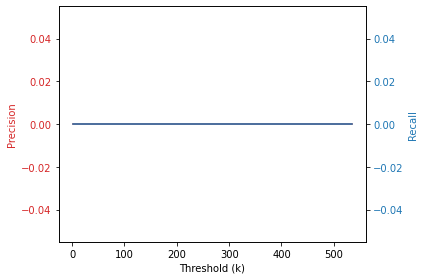

Graph for document 1


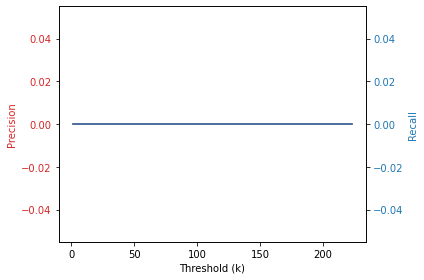

Graph for document 2


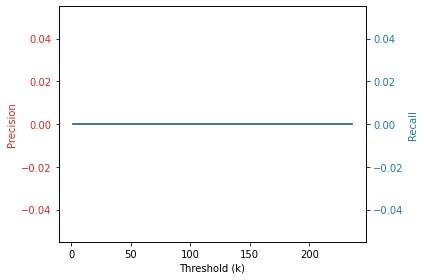

Graph for document 3


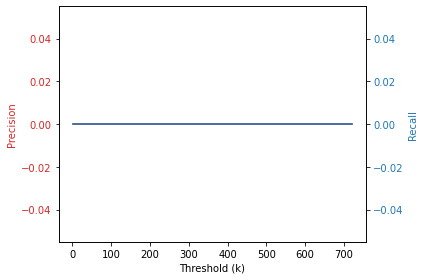

Graph for document 4


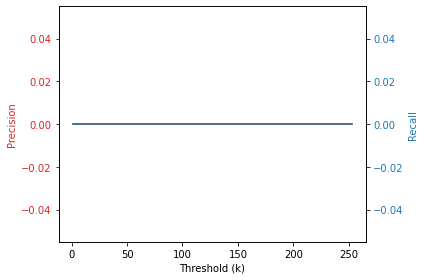

Graph for document 5


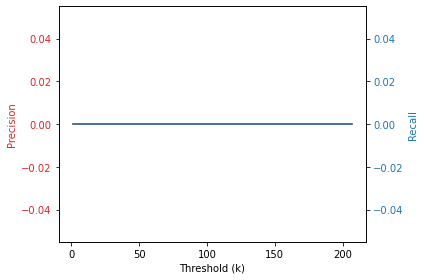

Graph for document 6


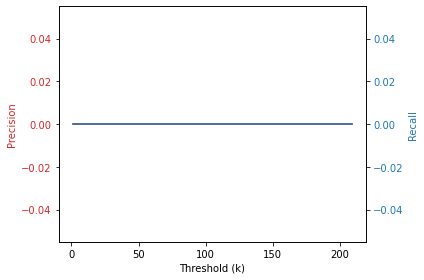

Graph for document 7


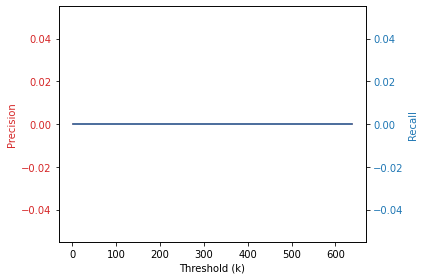

Graph for document 8


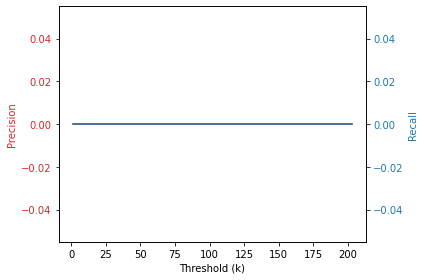

Graph for document 9


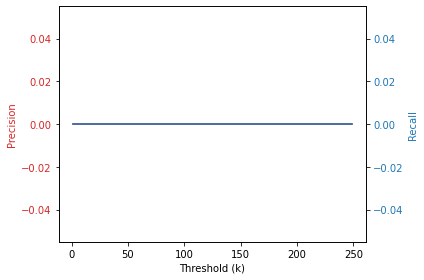

Graph for document 10


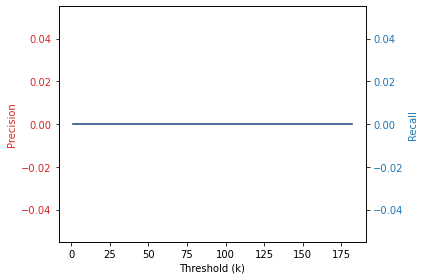

Graph for document 11


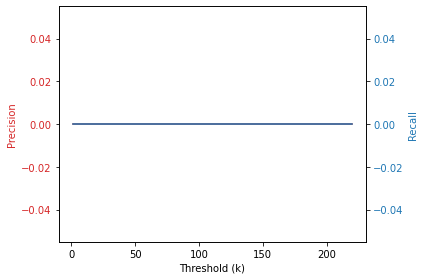

Graph for document 12


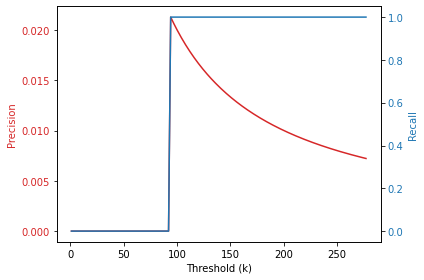

Graph for document 13


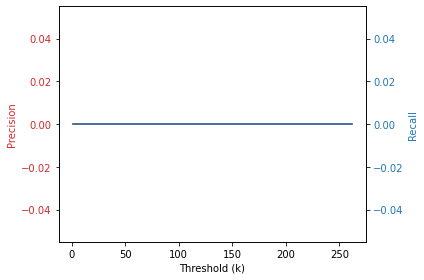

Graph for document 14


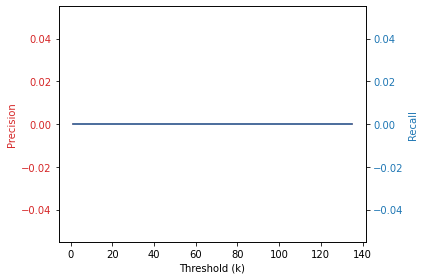

Graph for document 15


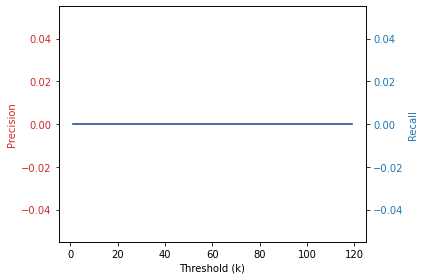

Graph for document 16


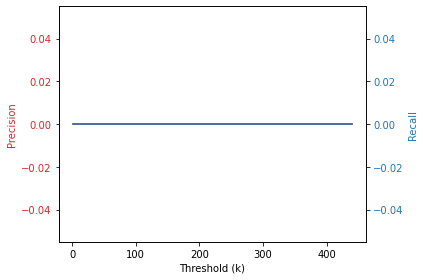

Graph for document 17


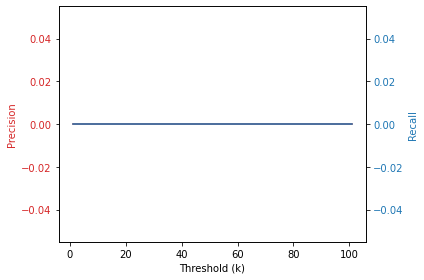

Graph for document 18


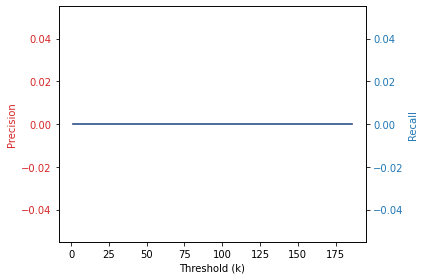

In [77]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [78]:
updated_unique_kephrases[5]

[('koordination von forschungs oder entwicklungsprojekten', 0.9789),
 ('tätigkeitsbereich', 0.9674),
 ('gutachtertätigkeit für wissenschaftliche fachzeitschriften', 0.9667),
 ('konzeption von forschungs oder entwicklungsprojekten', 0.9665),
 ('raum für privatleben', 0.9559),
 ('anträge zur forschungsförderung', 0.9512),
 ('wissenschaftlicher methoden verfahren oder techniken', 0.943),
 ('wissenschaftlicher publikationen', 0.9405),
 ('der beruflichen position', 0.9218),
 ('genaue berufsbezeichnung', 0.8985),
 ('wissenschaftlicher tagungen konferenzen kongresse', 0.8956),
 ('beteiligung an forschungs entwicklungsrelevanten entscheidungen', 0.8916),
 ('ausstattung mit arbeitsmitteln', 0.8809),
 ('der fachlichen qualifikation promotionsfach', 0.8696),
 ('berufliche position', 0.8673),
 ('fort und weiterbildungsmöglichkeiten', 0.8542),
 ('deutschland anzahl', 0.8491),
 ('wissenschaftlicher fachliteratur', 0.8369),
 ('berufliche aufgaben', 0.8313),
 ('eigene ideen', 0.8082),
 ('der folgenden

In [79]:
check_new = [elem[0] for elem in updated_unique_kephrases[12]]
len(check_new)

277

In [80]:
keyphrases_within_text

[['wissenschaftliche karriere', 'vereinbarkeit von familie und beruf'],
 [],
 [],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 [],
 [],
 ['wissenschaftliche aktivitäten'],
 ['digitale lehre', 'finanzielle situation'],
 [],
 [],
 [],
 [],
 [],
 []]

In [81]:
list(set(check_new).intersection(keyphrases_within_text[12]))

['finanzielle situation', 'digitale lehre']

In [82]:
# check_new.index('promotion') 

In [83]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [84]:
best_recall_indices

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 0, 0, 0, 0, 0, 0]

In [85]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [86]:
best_recall_indices_element

[0.0, 0, 0, 0, 0, 0.0, 0, 0, 0.0, 0, 0, 0.0, 1.0, 0, 0, 0, 0, 0, 0]

# Mapping

In [87]:
phrases = []
for i in range(len(updated_unique_kephrases)):
    phrases.append([])
    for j in range(len(updated_unique_kephrases[i])):
        phrases[i].append(updated_unique_kephrases[i][j][0])

In [88]:
phrases[0]

['arbeiten im team',
 'verfassen von publikationen verschriftlichen von ergebnissen',
 'hohe arbeitsbelastung durch berufliche tätigkeit',
 'verfahren in konfliktfällen',
 'organisation von tagungen und workshops',
 'konzipieren von forschungs und erhebungsdesigns',
 'gute aufstiegsmöglichkeiten',
 'gesundheitliche probleme',
 'durchführen von experimenten',
 'analysieren von daten',
 'ausüben von verwaltungstätigkeiten',
 'tätigkeit in einem etablierten betrieb unternehmen',
 'tätigkeit in einem startup unternehmen',
 'mangelnde fremdsprachenkenntnisse',
 'fehlende beratungs und unterstützungsangebote',
 'erheben von daten',
 'vereinbarkeit von beruf und familie',
 'ein arbeitstitel',
 'eine postdocstelle in der wissenschaft',
 'anleiten von anderen wissenschaftler inne koautor inn en',
 'die finanzierung von publikationen',
 'teaching professionals',
 'zeitliche ressourcen freiräume zum promovieren',
 'kulturelle schwierigkeiten',
 'schwierigkeiten finanzierung für mobilität oder for

In [89]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
keyphrase_embeddings = []
#Our sentences we like to encode
for i in range(len(phrases)):
    print(i,flush=True)
    keyphrase_embeddings.append([])
    for j in range(len(phrases[i])):
        #Sentences are encoded by calling model.encode()
        keyphrase_embeddings[i].append(model.encode(phrases[i][j]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [90]:
keyphrase_embeddings[0][0]

array([-1.09116614e+00,  4.75068867e-01, -8.18142518e-02,  1.62412930e+00,
        7.09520221e-01,  5.80175579e-01,  2.13135213e-01, -4.02643122e-02,
        8.71362090e-01, -3.95062268e-01, -4.90917116e-01,  2.79214323e-01,
       -2.82903850e-01,  9.26515400e-01, -6.92056537e-01,  1.18281531e+00,
       -7.02826679e-01,  1.50387257e-01,  4.05885994e-01, -5.84657073e-01,
        7.46725053e-02,  2.84744799e-01, -1.42419904e-01, -6.22598156e-02,
        4.52856869e-01,  1.27662444e+00,  4.85420287e-01, -6.95926994e-02,
       -2.09543072e-02, -5.21925092e-01,  8.67976189e-01, -8.10833722e-02,
       -4.73285951e-02, -4.33042139e-01, -1.08588338e-02, -4.49757665e-01,
        6.91713095e-01,  1.33830428e-01,  2.55711496e-01,  1.49005607e-01,
       -6.04098797e-01, -4.12266642e-01, -1.44627690e+00,  2.27203107e+00,
        2.77822018e-02,  3.83006245e-01, -1.55769557e-01,  1.03286980e-02,
        1.53315842e-01, -6.14527822e-01, -4.63090092e-01,  2.65886128e-01,
        5.58067918e-01,  

In [1]:
import pickle
with open('/home/pawan/KeyBert/Thesaurus_lists/CESSDA_Controlled_Vocabulary_for_TopicClassification.pkl', 'rb') as f:
    newlist_thesaurus = pickle.load(f)

In [4]:
len(newlist_thesaurus)

95

In [104]:
#lowercase thesaurus words
new_thesaurus_list = []
for item in newlist_thesaurus:
    new_thesaurus_list.append(item.lower())

In [105]:
new_thesaurus_list

['chirurgen',
 'verhuetungsmittel ',
 ' publikumsforschung',
 ' ansehen eines staates',
 'chat ',
 'zahnaerzte ',
 'zahnfäulnis ',
 'vermieter',
 'medizinische selbstdiagnose-testsets ',
 ' mädchen',
 'datenuebertragung ',
 'infrastruktureinrichtungen ',
 'verbrechen (straftaten) ',
 'ehefrauen ',
 'schifffahrt auf flüssen ',
 'tarifaere einfuhrschranken ',
 'telekolleg ',
 'dienstreisen ',
 ' betreuung im gewohnten umfeld',
 ' wortschatzkenntnis',
 'verhältnis zwischen polizei und öffentlichkeit',
 ' politische einflussnahme',
 'radiobranche ',
 'haushaltsgroesse ',
 'judenfeindlichkeit ',
 'ahs-oberstufe ',
 ' lagerplätze für reisende und fahrende',
 'kinder aus dem reagenzglas ',
 'hausgeburten',
 ' physik, chemie und geowissenschaften (ausbildung)',
 ' wirtschaftliche indikatoren',
 'jubiläumsfeste ',
 'lebenslange fortbildung ',
 'laboratorien',
 'wasserqualitaet ',
 ' ländliche planung',
 'unbefugter gebrauch eines fahrzeugs ',
 ' behinderteneinrichtungen',
 'datenfernuebertragun

In [106]:
# optimization.
for i in range(len(new_thesaurus_list)):
    stripped_new_thesaurus_list = [s.strip() for s in new_thesaurus_list]

In [107]:
stripped_new_thesaurus_list

['chirurgen',
 'verhuetungsmittel',
 'publikumsforschung',
 'ansehen eines staates',
 'chat',
 'zahnaerzte',
 'zahnfäulnis',
 'vermieter',
 'medizinische selbstdiagnose-testsets',
 'mädchen',
 'datenuebertragung',
 'infrastruktureinrichtungen',
 'verbrechen (straftaten)',
 'ehefrauen',
 'schifffahrt auf flüssen',
 'tarifaere einfuhrschranken',
 'telekolleg',
 'dienstreisen',
 'betreuung im gewohnten umfeld',
 'wortschatzkenntnis',
 'verhältnis zwischen polizei und öffentlichkeit',
 'politische einflussnahme',
 'radiobranche',
 'haushaltsgroesse',
 'judenfeindlichkeit',
 'ahs-oberstufe',
 'lagerplätze für reisende und fahrende',
 'kinder aus dem reagenzglas',
 'hausgeburten',
 'physik, chemie und geowissenschaften (ausbildung)',
 'wirtschaftliche indikatoren',
 'jubiläumsfeste',
 'lebenslange fortbildung',
 'laboratorien',
 'wasserqualitaet',
 'ländliche planung',
 'unbefugter gebrauch eines fahrzeugs',
 'behinderteneinrichtungen',
 'datenfernuebertragung',
 'getrenntlebend',
 'abhaengi

In [97]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
thesauri_keyphrase_embeddings = []
#Our sentences we like to encode
for i in range(len(stripped_new_thesaurus_list)):
    print(i,flush=True)
    #Sentences are encoded by calling model.encode()
    thesauri_keyphrase_embeddings.append(model.encode(stripped_new_thesaurus_list[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


KeyboardInterrupt: 

In [ ]:
len(thesauri_keyphrase_embeddings)

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli')
similarity_thesaurus_new = []
for i in range(len(keyphrase_embeddings)):
    print(i,flush=True)
    similarity_thesaurus_new.append([])
    cosine_scores =[]
    for j in range(len(thesauri_keyphrase_embeddings)):
        print(j,flush=True)
        cosine_scores.append(util.cos_sim(keyphrase_embeddings[i], thesauri_keyphrase_embeddings[j]))
    transpose_cs = list(map(list, zip(*cosine_scores)))
    for k in range(len(transpose_cs)):
        max_value = max(transpose_cs[k])[0]
        index = transpose_cs[k].index(max(transpose_cs[k]))
        similarity_thesaurus_new[i].append(((index, max_value)))

In [ ]:
# import pickle 
# with open('keyphrase_similarity_thesaurus_ZBW_Standard_Thesaurus_Wirtschaft.pkl', 'wb') as f:
#     pickle.dump(similarity_thesaurus_new, f)

In [108]:
import pickle
with open('Similarity_thesaurus_and_keybert_keyphrases/keyphrase_similarity_thesaurus_ELSST_thesauri.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [109]:
mynewlist[0]

[(6643, tensor(0.7660)),
 (5250, tensor(0.6961)),
 (4247, tensor(0.6452)),
 (5508, tensor(0.6744)),
 (4932, tensor(0.6972)),
 (6428, tensor(0.7153)),
 (4357, tensor(0.8826)),
 (7019, tensor(0.5288)),
 (1453, tensor(0.6947)),
 (2511, tensor(0.8279)),
 (1500, tensor(0.6950)),
 (6252, tensor(0.7212)),
 (1438, tensor(0.7141)),
 (1165, tensor(0.6907)),
 (6501, tensor(0.5426)),
 (3730, tensor(0.8453)),
 (1607, tensor(0.8452)),
 (6466, tensor(0.7087)),
 (5071, tensor(0.7024)),
 (5071, tensor(0.7367)),
 (6675, tensor(0.5229)),
 (6596, tensor(0.7515)),
 (5380, tensor(0.5561)),
 (2790, tensor(0.5833)),
 (3934, tensor(0.4362)),
 (1453, tensor(0.6648)),
 (4854, tensor(0.6199)),
 (1561, tensor(0.6822)),
 (4471, tensor(0.6913)),
 (4806, tensor(0.6830)),
 (6428, tensor(0.8201)),
 (618, tensor(0.6994)),
 (5071, tensor(0.7417)),
 (3887, tensor(0.6275)),
 (4333, tensor(0.5185)),
 (2251, tensor(0.6059)),
 (3071, tensor(0.4704)),
 (6745, tensor(0.7229)),
 (5909, tensor(0.5124)),
 (4496, tensor(0.6323)),
 

In [110]:
complete_keyphrase_thesaurus = []
for i in range(len(mynewlist)):
    complete_keyphrase_thesaurus.append([])
    for j in range(len(mynewlist[i])):
        keyphrase_main = phrases[i][j]
        thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
        similarity_value = mynewlist[i][j][1]
        complete_keyphrase_thesaurus[i].append(((keyphrase_main,thesaurus_word,similarity_value)))

In [111]:
sorted_complete_keyphrase_thesaurus = []
for i in range(len(complete_keyphrase_thesaurus)):
    sorted_complete_keyphrase_thesaurus.append(sorted(complete_keyphrase_thesaurus[i], key=lambda tup: tup[2], reverse=True))

In [112]:
sorted_complete_keyphrase_thesaurus[0]

[('staatsangehörigkeit', 'staatsangehörigkeit', tensor(1.0000)),
 ('qualifikationen', 'qualifikationen', tensor(1.0000)),
 ('kinder', 'kinder', tensor(1.0000)),
 ('schreiben', 'schreiben', tensor(1.0000)),
 ('karriereentwicklung', 'karriereentwicklung', tensor(1.0000)),
 ('wissenschaftler', 'wissenschaftler', tensor(1.0000)),
 ('beschäftigung', 'beschäftigung', tensor(1.0000)),
 ('kind', 'kind', tensor(1.0000)),
 ('schicksal', 'schicksal', tensor(1.0000)),
 ('arbeitgeber', 'arbeitgeber', tensor(1.0000)),
 ('einkommen', 'einkommen', tensor(1.0000)),
 ('fakultäten', 'fakultäten', tensor(1.0000)),
 ('daten', 'daten', tensor(1.0000)),
 ('befragungen', 'befragungen', tensor(1.0000)),
 ('berufliche stellung', 'berufliche stellung', tensor(1.0000)),
 ('beruflichen stellung', 'berufliche stellung', tensor(0.9937)),
 ('berufliche qualifikation', 'berufliche qualifikationen', tensor(0.9679)),
 ('die behinderung', 'behinderung', tensor(0.9597)),
 ('der behinderung', 'behinderung', tensor(0.9473))

In [ ]:
# import pickle
 
# with open('weightage_schemen.pkl', 'wb') as f:
#     pickle.dump(sorted_complete_keywords_thesaurus, f)

In [ ]:
# complete_keywords_thesaurus = []
# for i in range(len(mynewlist)):
#     complete_keywords_thesaurus.append([])
#     for j in range(len(mynewlist[i])):
#         keyword_main = words[i][j]
#         thesaurus_word = stripped_new_thesaurus_list[mynewlist[i][j][0]]
#         similarity_value = mynewlist[i][j][1] + updated_unique_keyword[i][j][1]
#         complete_keywords_thesaurus[i].append(((keyword_main,thesaurus_word,similarity_value)))

In [ ]:
# sorted_complete_keywords_thesaurus = []
# for i in range(len(complete_keywords_thesaurus)):
#     sorted_complete_keywords_thesaurus.append(sorted(complete_keywords_thesaurus[i], key=lambda tup: tup[2], reverse=True))

In [ ]:
elem = []
for i in range(len(sorted_complete_keywords_thesaurus)):
    elem.append([])
    for x, y, z in sorted_complete_keywords_thesaurus[i]:
        elem[i].append(y)
        elem[i].append(x)

In [ ]:
elem[0]

In [ ]:
result =[]
for i in range(len(elem)):
    result.append([])
    for item in elem[i]:
        if item not in result[i]:
            result[i].append(item)

In [ ]:
result[0]

In [ ]:
predicted_new=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(result)):  
    predicted_new.append([])           #used for nested list
    for j in range(1,int(len(result[i])/chunk_size)+1):
        predicted_new[i].append(([elem for elem in result[i]])[0:j*chunk_size])

In [ ]:
predicted_new[0][0]

In [ ]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,keyphrases_within_text):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(keyphrases_within_text)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [ ]:
eval_values_new = []
for i in range(len(predicted_new)):
    eval_values_new.append([]) 
    for j in range(len(predicted_new[i])):
        eval_values_new[i].append(evaluate_keywords(predicted_new[i][j], keyphrases_within_text[i]))

In [ ]:
precison_values_new = []
for i in range(len(eval_values_new)):
    precison_values_new.append([])
    for a_tuple in eval_values_new[i]:
        precison_values_new[i].append(a_tuple[0])

In [ ]:
recall_values_new = []
for i in range(len(eval_values_new)):
    recall_values_new.append([])
    for a_tuple in eval_values_new[i]:
        recall_values_new[i].append(a_tuple[1])

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values_new)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values_new[i])+1))]
        data1 = precison_values_new[i]
        data2 = recall_values_new[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [ ]:
test_new = [elem for elem in result[3]]
len(test_new)

In [ ]:
test_new

In [ ]:
keywords_set[0]

In [ ]:
list(set(test_new).intersection(keywords_set[3]))

In [ ]:
test_new.index('promovierende')

In [ ]:
recall_indices_best = []
for i in range(len(recall_values_new)):
    recall_indices_best.append(recall_values_new[i].index(max(recall_values_new[i])))

In [ ]:
recall_indices_best 

In [ ]:
# recall_indices_best 

In [ ]:
recall_indices_element_best = []

for i in range(len(recall_indices_best)):
    Recall_values = recall_values_new[i]
    recall_indices_element_best.append(Recall_values[recall_indices_best[i]])

In [ ]:
recall_indices_element_best

In [ ]:
# #mapping candidate keywords with thesaurus 
# thesaurus_data = pd.read_csv("/home/pawan/ELSST_Thesaurus.csv")

In [ ]:
# thesaurus_data

In [ ]:
# thesaurus_list = thesaurus_data.values.tolist()

In [ ]:
# thesaurus_list

In [ ]:
# #lowercase thesaurus words
# new_thesaurus_list = []
# for sublist in thesaurus_list:
#     new_sublist = []
#     for item in sublist:
#         new_sublist.append(item.lower())
#     new_thesaurus_list.append(new_sublist) 

In [ ]:
# #mapping keyword from keybert with thesaurus 

# keywords_after_bruteforce_mapping=[]
# for i in range(len(data)):
#     keywords_after_bruteforce_mapping.append([])
#     for elem in list(updated_unique_keyword[0]):
#         temp = [tuple((index1,index2))for index1,value1 in enumerate(new_thesaurus_list) for index2,value2 in enumerate(value1) if value2==elem]
#         if (len(temp))!=0:
#             for elem1 in temp:
#                 if elem1[1]==0:
#                     if new_thesaurus_list[elem1[0]][1] == '9999':
#                         keywords_after_bruteforce_mapping[i].append(elem)
#                     else:
#                         keywords_after_bruteforce_mapping[i].append(tuple((elem,new_thesaurus_list[elem1[0]][1])))
                        
#                 elif elem1[1]==1:
#                     keywords_after_bruteforce_mapping[i].append(elem)

In [ ]:
# keywords_after_bruteforce_mapping[0]

In [ ]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
# def evaluate_keywords(nlp,proposed,keyphrases_within_text):
#   """
#   Returns precision, recall, and f1 score for proposed keywords against ground truth
#   """
  
#   proposed_set = list(set(proposed))
#   true_set = list(set(keyphrases_within_text))
#   tp_temp = []
  
#   for i in range(len(proposed_set)):
#         for j in range(len(true_set)):
#             if nlp(proposed_set[i]).similarity(nlp(true_set[j])) > 0.96:
#                 tp_temp.append(true_set[j])
#                 break
            
#   true_positives = len(tp_temp)
# #   true_positives = len(proposed_set.intersection(true_set))
#   if len(proposed_set)==0:
#     precision = 0
#   else:
#     # note denominator reflects total number of words
#     # not total number of unique words
#     precision = true_positives/float(len(proposed)) 
      
#   if len(true_set)==0:
#     recall = 0
#   else:
#     recall = true_positives/float(len(true_set))
  
#   if precision + recall > 0:
#     f1 = 2*precision*recall/float(precision + recall)
#   else:
#     f1 = 0

#   return (precision, recall, f1)